In [17]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [18]:
#Reading the data File
df = pd.read_csv('Customer-Churn.csv')

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
#Check the various attributes of data like shape (rows and columns), Columns
df.shape

(7043, 21)

In [21]:
#Columns attribute can be df.columns or df.columns.values
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
# Check the descriptive statistics of numeric variables(5 number numeric summary)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually categorical, hence the 25%-50%-75% distribution is not ideal

75% customers have tenure less than 55 months

Average Tenure is 32 months

Average Monthly charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month


In [24]:
#Computing the number of people who churned
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [25]:
df['Churn'].value_counts()/len(df)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

• Data is highly imbalanced, ratio = 73:27 
• So we analyse the data with other features while taking the target values separately to get some insights.

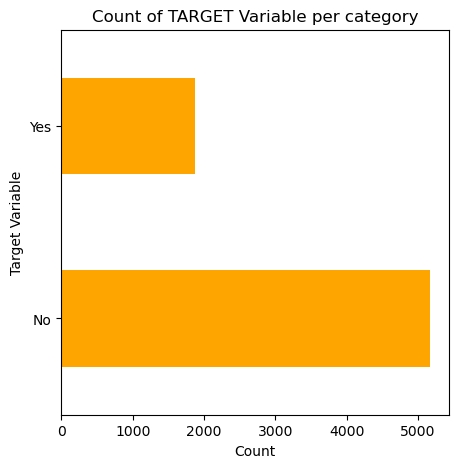

In [26]:
df['Churn'].value_counts().plot(kind='barh', color = 'orange', figsize=(5, 5))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable per category");

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

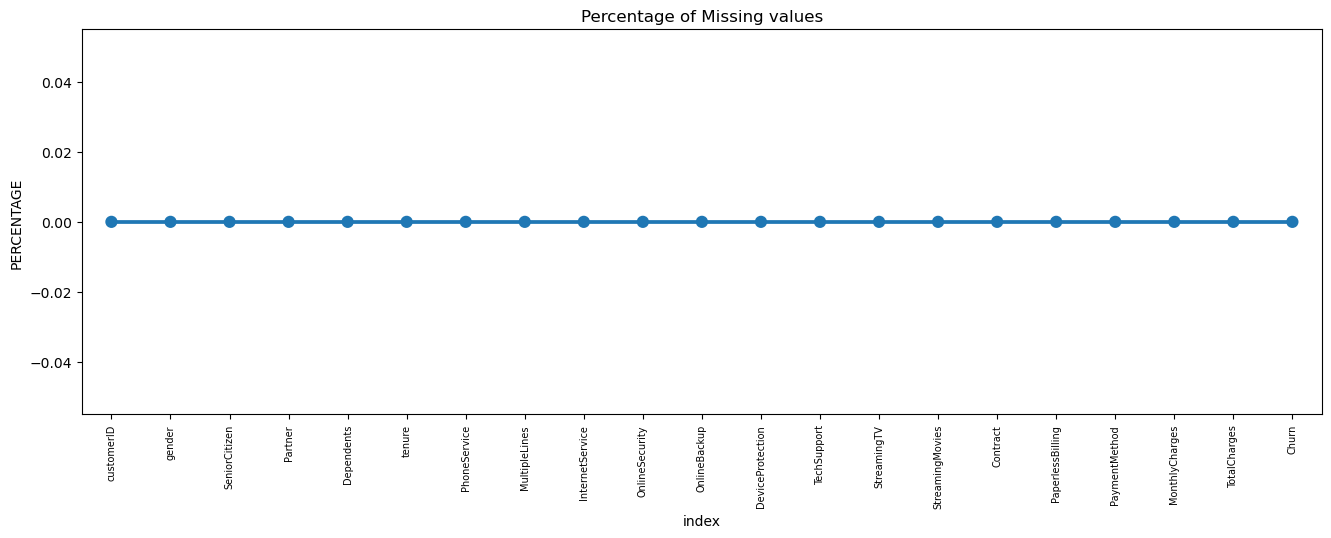

In [29]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# Missing Data - Initial Intuition

Here, we don't have any missing data.

General Thumb Rules:

• For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
• For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
• As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

# Data Cleaning

1. Create a copy of base data for manupulation & processing

In [30]:
new_df = df.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [31]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

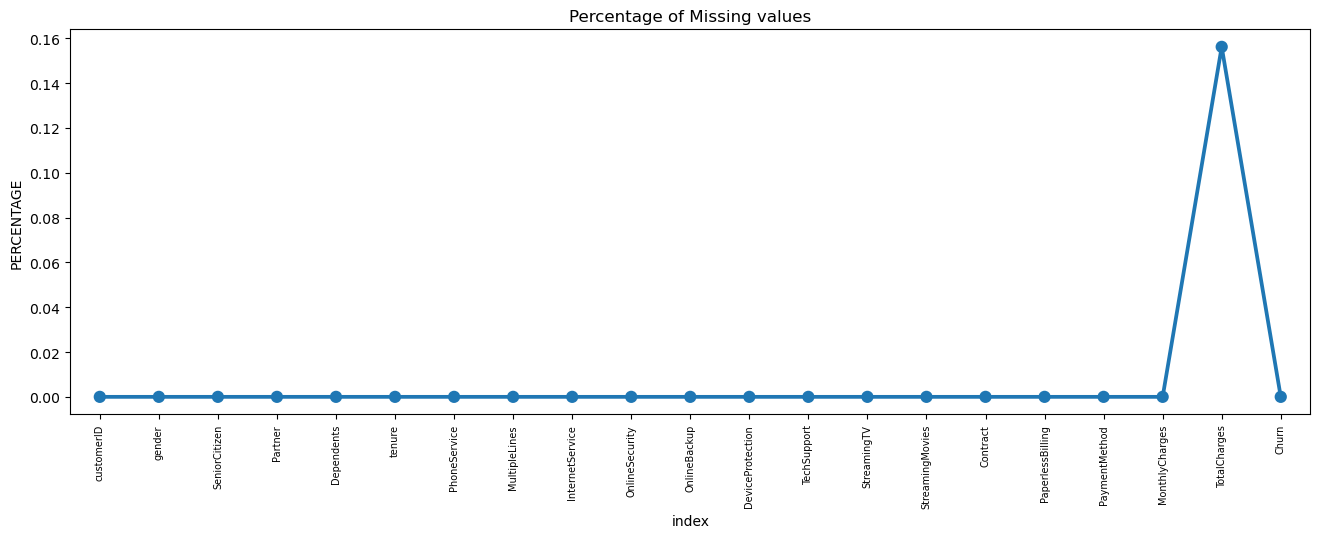

In [34]:
missing = pd.DataFrame((new_df.isnull().sum())*100/new_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [35]:
new_df.loc[new_df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatment

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [36]:
#Removing missing values 
new_df.dropna(how = 'any', inplace = True)

#new_df.fillna(0)

In [37]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
new_df.shape

(7032, 21)

5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [39]:
# Get the max tenure
print(new_df['tenure'].max())

72


In [40]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

print(labels)


['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [41]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

new_df['tenure_group'] = pd.cut(new_df.tenure, range(1, 80, 12), right=False, labels=labels)

In [42]:
new_df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

6. Remove columns not required for processing

In [43]:
#drop column customerID and tenure
new_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [44]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration

**1. ** Plot distibution of individual predictors by churn

 # Univariate Analysis

In [45]:
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [46]:
new_df.Churn.value_counts()/len(new_df)*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

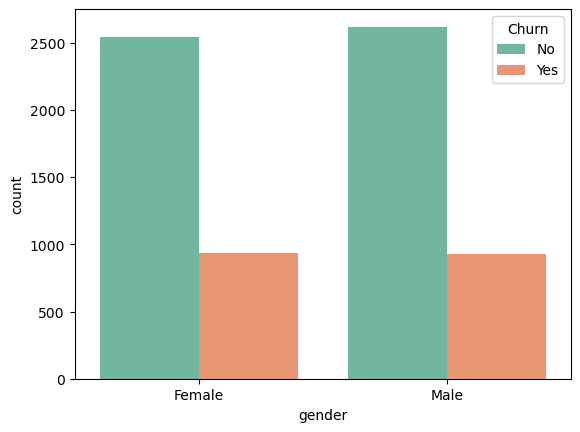

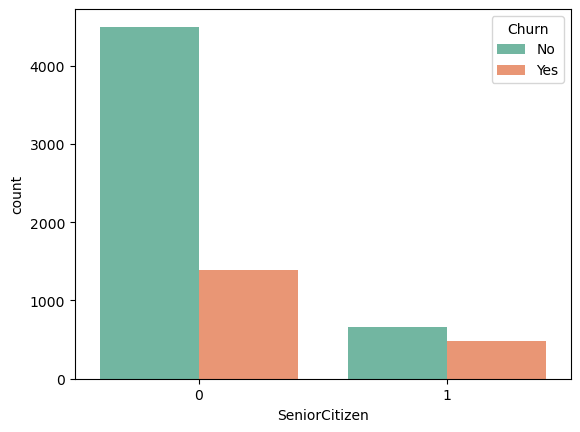

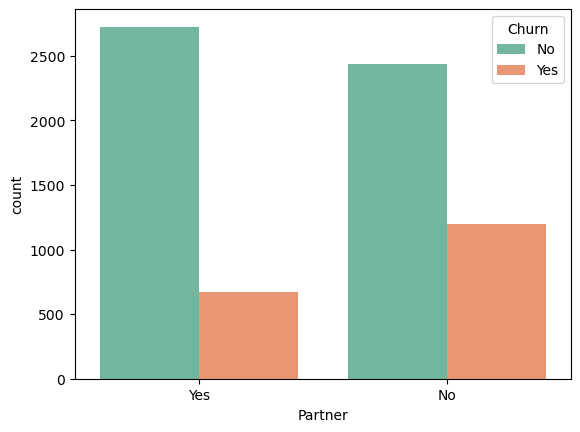

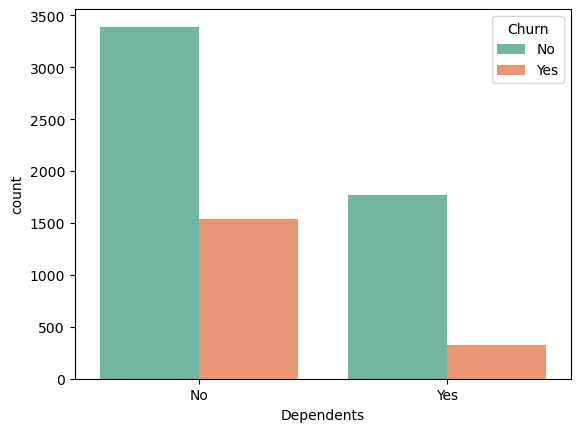

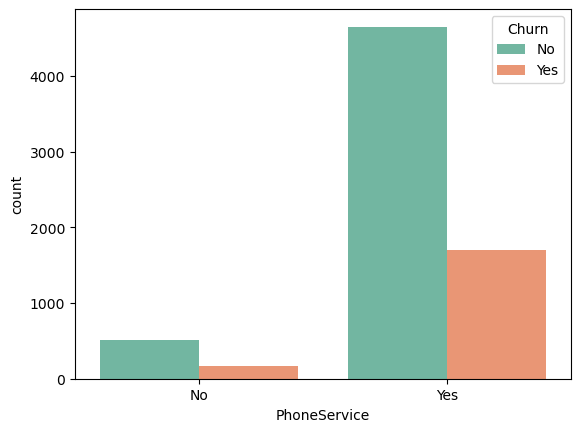

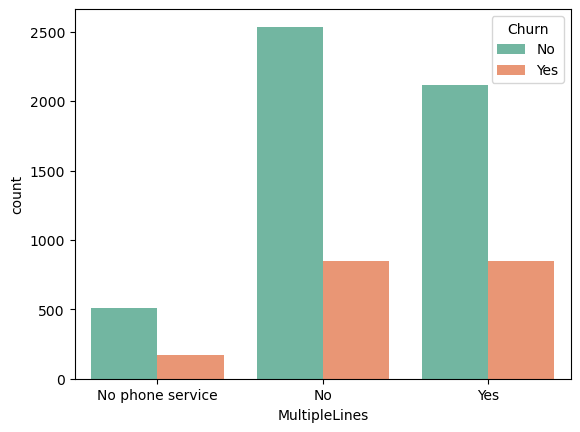

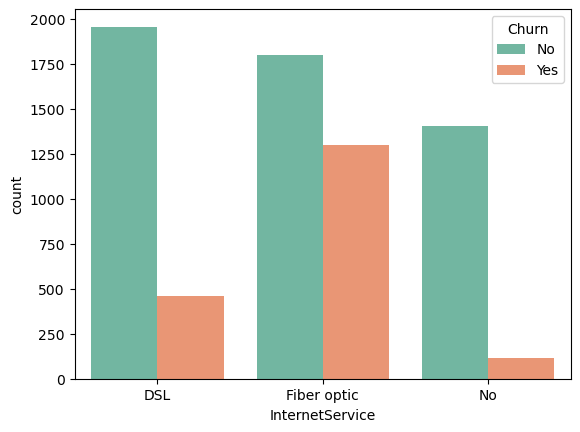

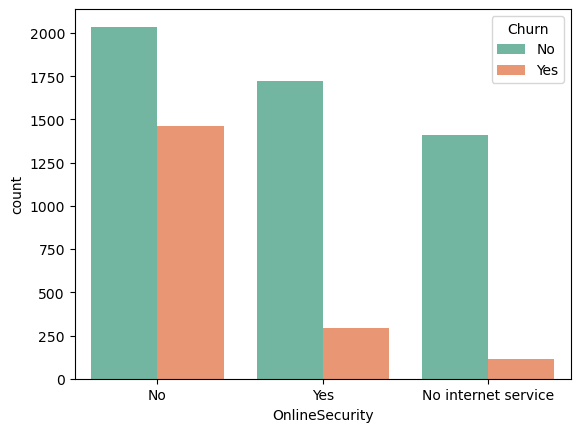

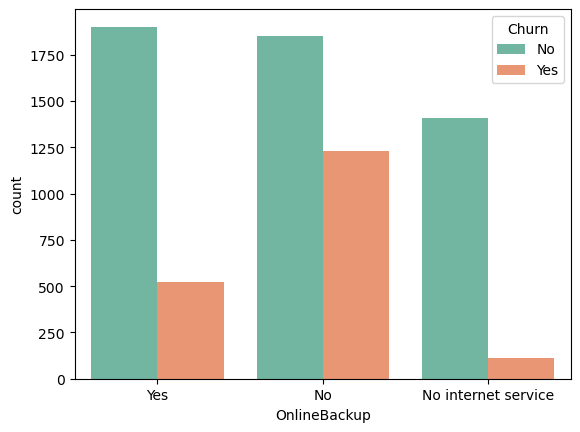

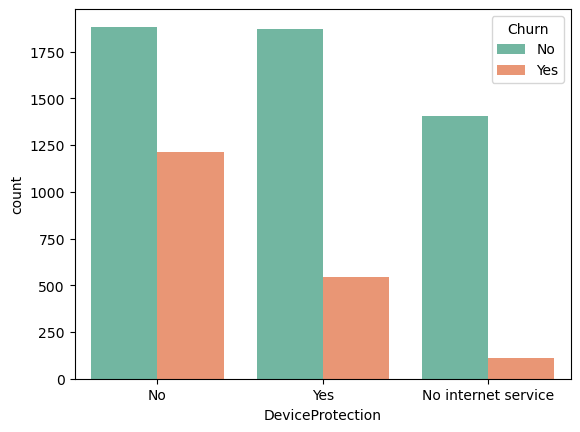

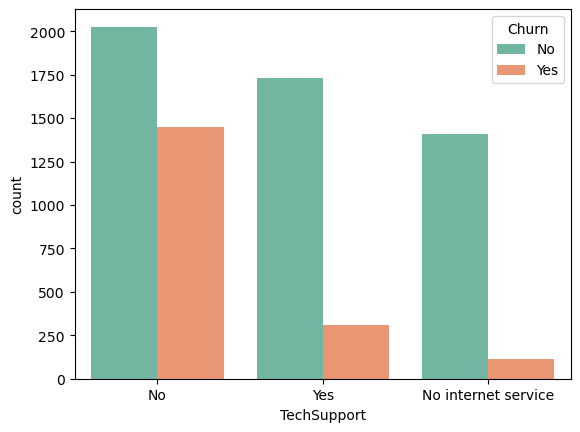

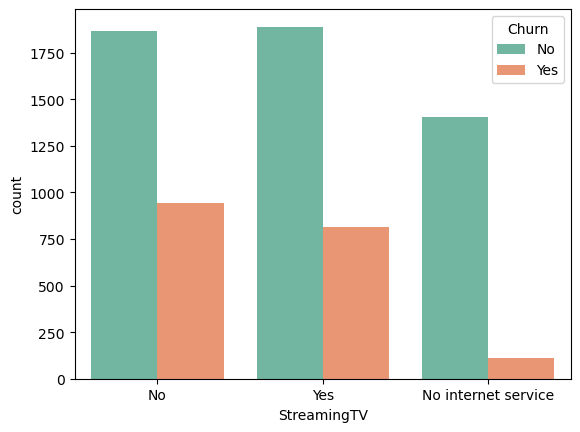

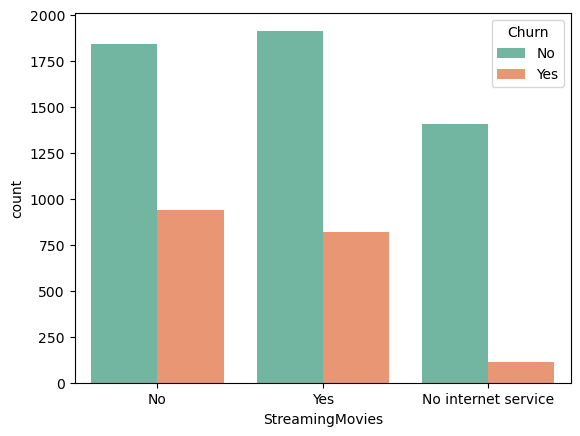

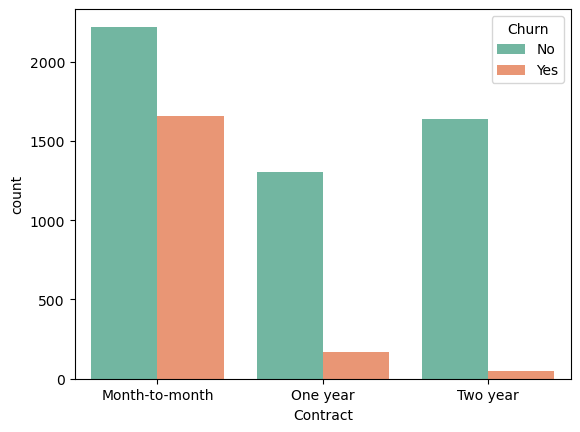

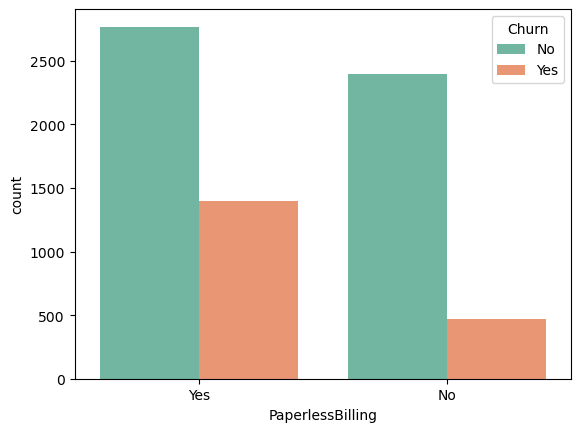

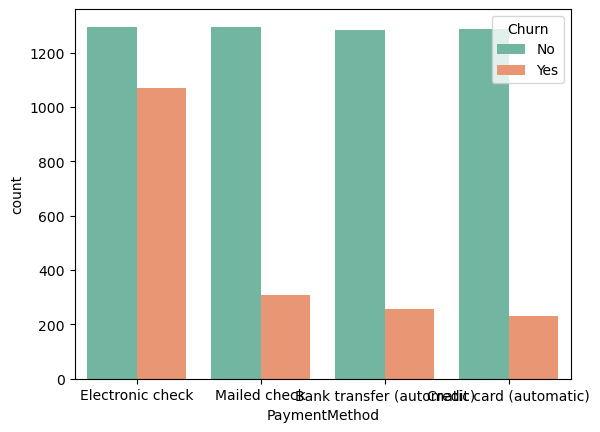

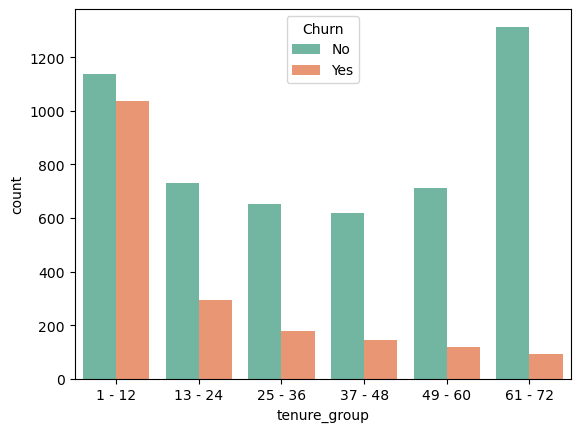

In [47]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df, x=predictor, hue='Churn', palette='Set2')

In [48]:
new_df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [49]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [50]:
new_df1_target1.gender.value_counts()

Female    939
Male      930
Name: gender, dtype: int64

In [51]:
new_df.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [52]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [53]:
new_df1_target1.SeniorCitizen.value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

In [54]:
new_df.Partner.value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [55]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [56]:
new_df1_target1.Partner.value_counts()

No     1200
Yes     669
Name: Partner, dtype: int64

In [57]:
new_df.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [58]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [59]:
new_df1_target1.Dependents.value_counts()

No     1543
Yes     326
Name: Dependents, dtype: int64

In [60]:
new_df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [61]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [62]:
new_df1_target1.PhoneService.value_counts()

Yes    1699
No      170
Name: PhoneService, dtype: int64

In [63]:
new_df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [64]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [65]:
new_df1_target1.MultipleLines.value_counts()

Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64

In [66]:
new_df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [67]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [68]:
new_df1_target1.InternetService.value_counts()

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

In [69]:
new_df.OnlineSecurity.value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [70]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [71]:
new_df1_target1.OnlineSecurity.value_counts()

No                     1461
Yes                     295
No internet service     113
Name: OnlineSecurity, dtype: int64

In [72]:
new_df.OnlineBackup.value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [73]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [74]:
new_df1_target1.OnlineBackup.value_counts()

No                     1233
Yes                     523
No internet service     113
Name: OnlineBackup, dtype: int64

In [75]:
new_df.DeviceProtection.value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [76]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [77]:
new_df1_target1.DeviceProtection.value_counts()

No                     1211
Yes                     545
No internet service     113
Name: DeviceProtection, dtype: int64

In [78]:
new_df.TechSupport.value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [79]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [80]:
new_df1_target1.TechSupport.value_counts()

No                     1446
Yes                     310
No internet service     113
Name: TechSupport, dtype: int64

In [81]:
new_df.StreamingTV.value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [82]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [83]:
new_df1_target1.StreamingTV.value_counts()

No                     942
Yes                    814
No internet service    113
Name: StreamingTV, dtype: int64

In [84]:
new_df.StreamingMovies.value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [85]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [86]:
new_df1_target1.StreamingMovies.value_counts()

No                     938
Yes                    818
No internet service    113
Name: StreamingMovies, dtype: int64

In [87]:
new_df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [88]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [89]:
new_df1_target1.Contract.value_counts()

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

In [90]:
new_df.PaperlessBilling.value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [91]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [92]:
new_df1_target1.PaperlessBilling.value_counts()

Yes    1400
No      469
Name: PaperlessBilling, dtype: int64

In [93]:
new_df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [94]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [95]:
new_df1_target1.PaymentMethod.value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

In [96]:
new_df.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [97]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [98]:
new_df1_target1.tenure_group.value_counts()

1 - 12     1037
13 - 24     294
25 - 36     180
37 - 48     145
49 - 60     120
61 - 72      93
Name: tenure_group, dtype: int64

In [99]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [100]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [101]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. Convert all the categorical variables into dummy variables

In [125]:
# For Machine Learning (Predictive Modelling), we need to perform Feature Encoding
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


*** Relationship between Monthly Charges and Total Charges

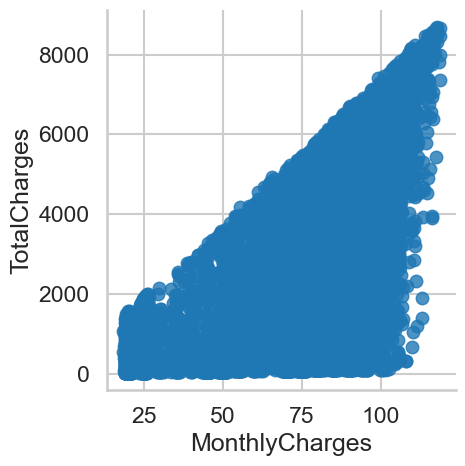

In [130]:
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [120]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262024

Total Charges increase as Monthly Charges increase - as expected.

 *** Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

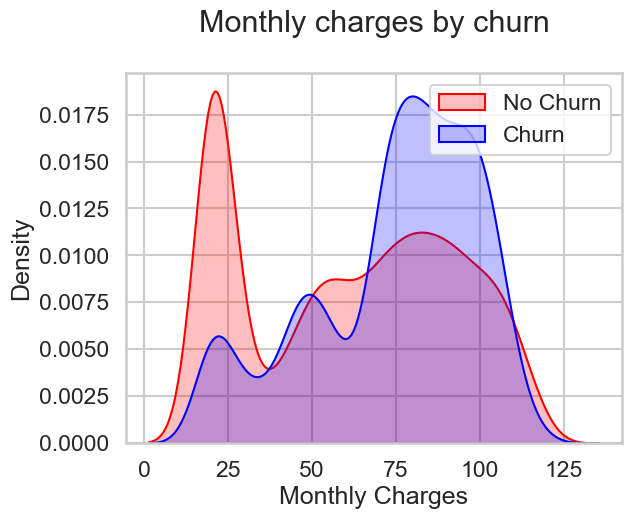

In [121]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

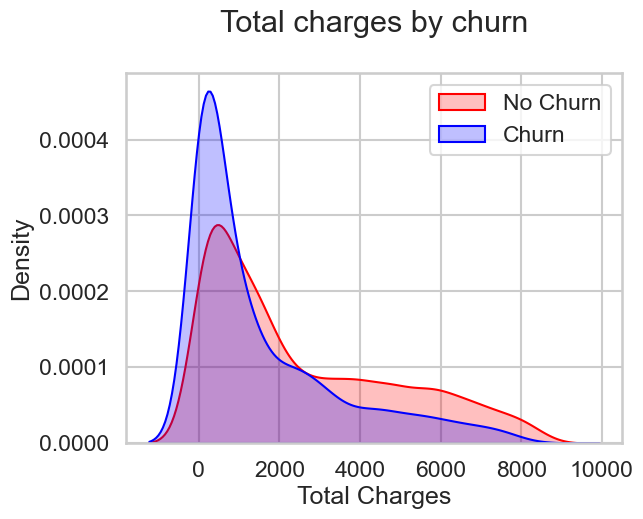

In [122]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

## Build a correlation of all predictors with 'Churn' **

<Axes: >

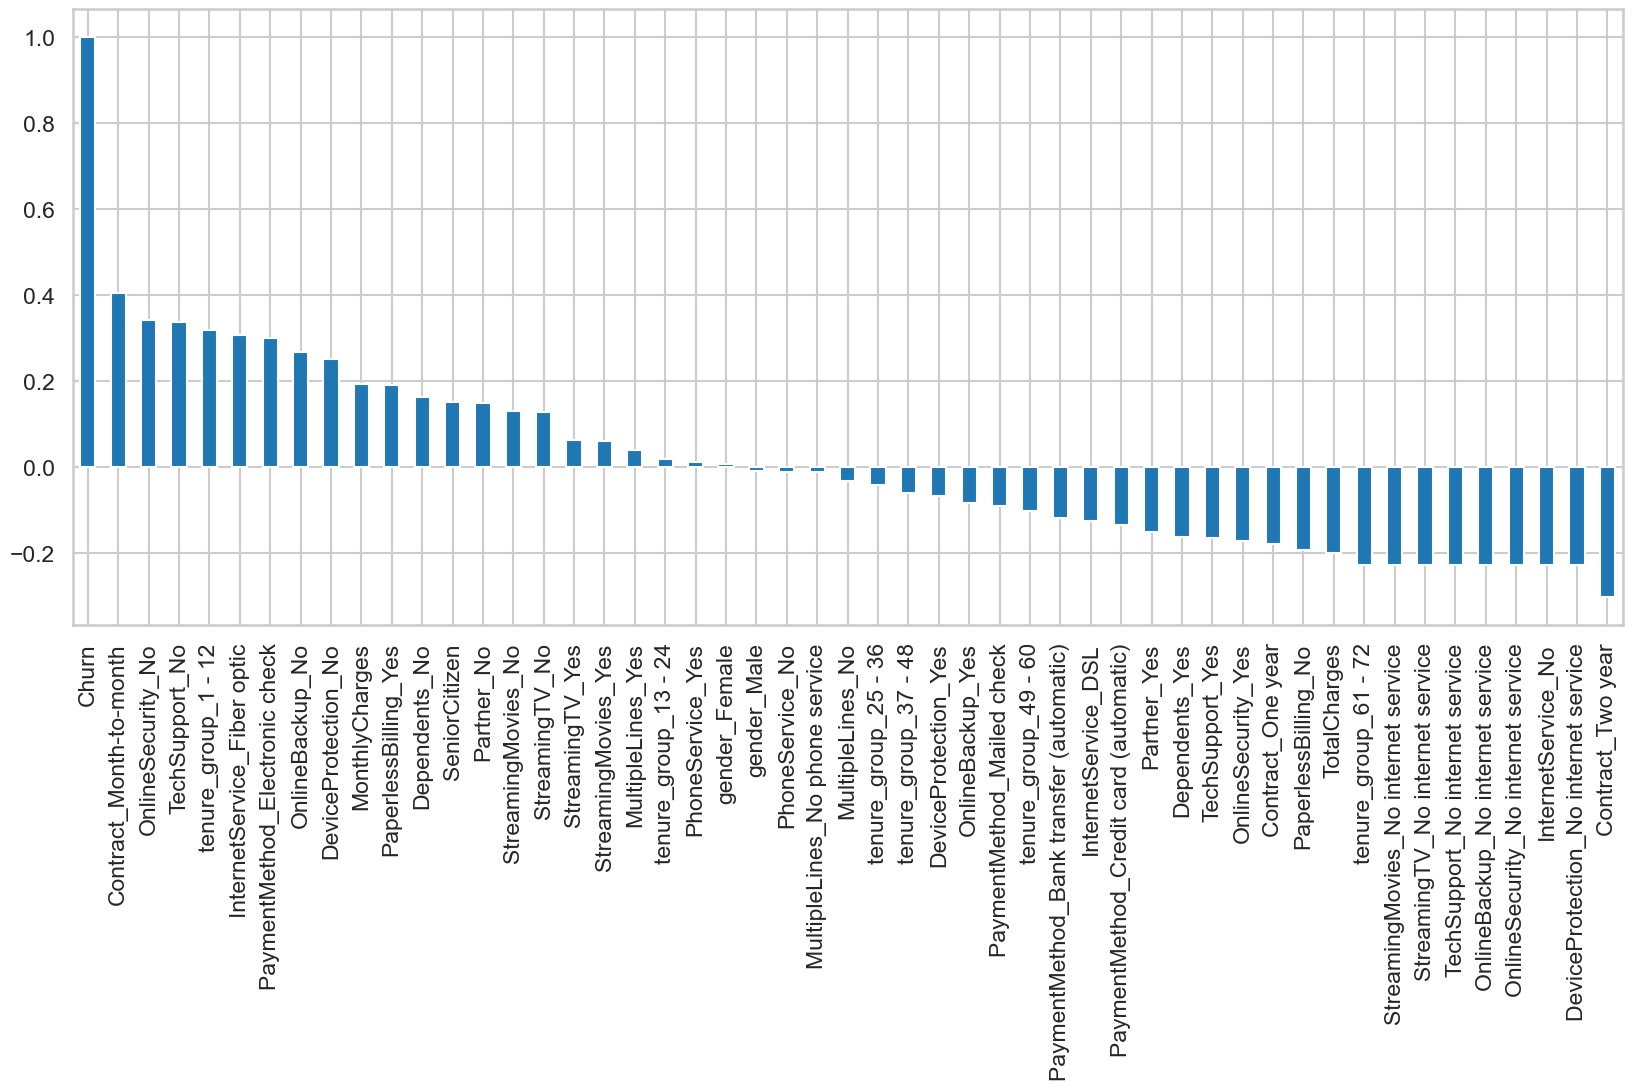

In [123]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight**
**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

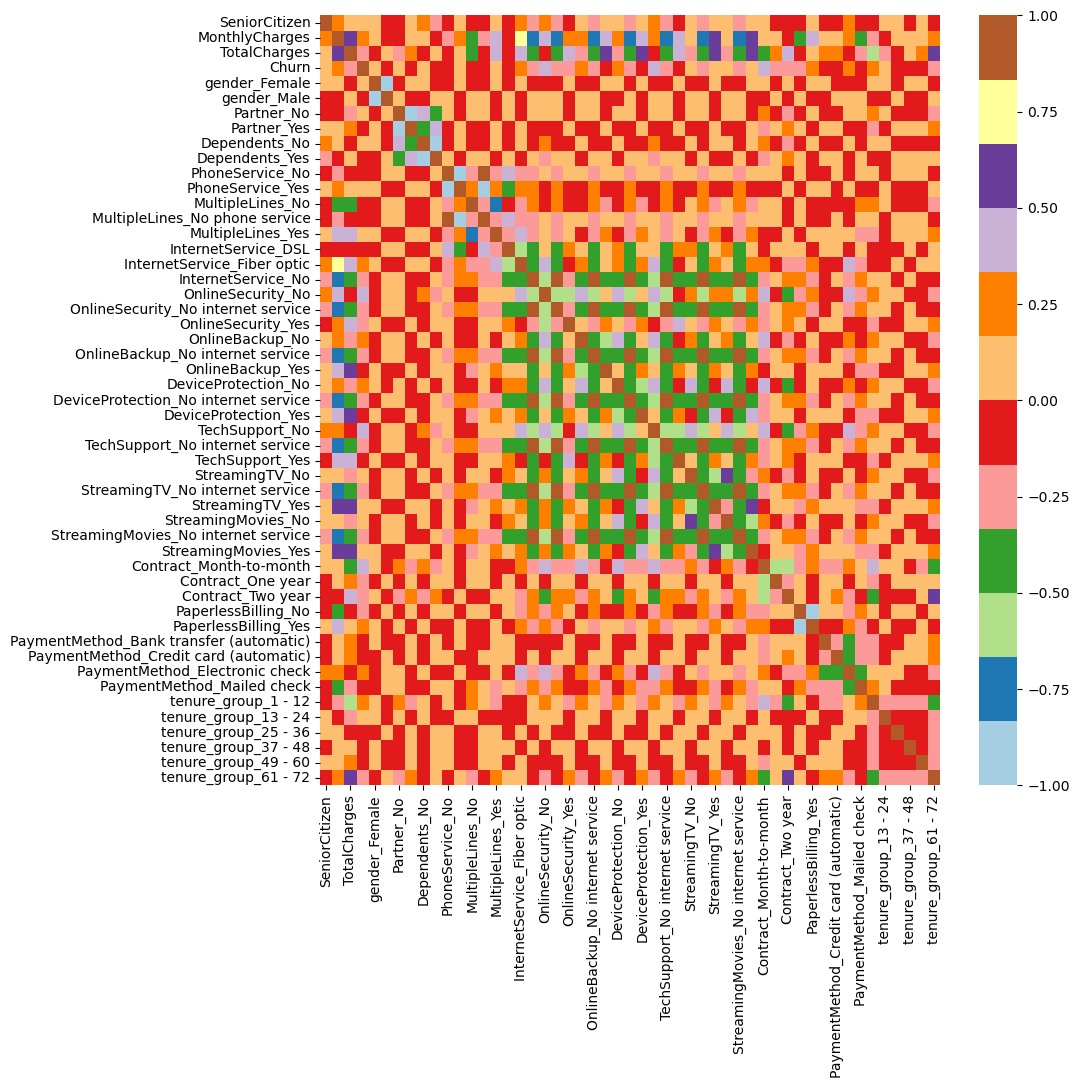

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [109]:
new_df1_target0=new_df.loc[new_df["Churn"]==0] #Active Customers
new_df1_target1=new_df.loc[new_df["Churn"]==1] #Churned Customers

In [110]:
len(new_df1_target0)

5163

In [111]:
len(new_df1_target1)

1869

In [112]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

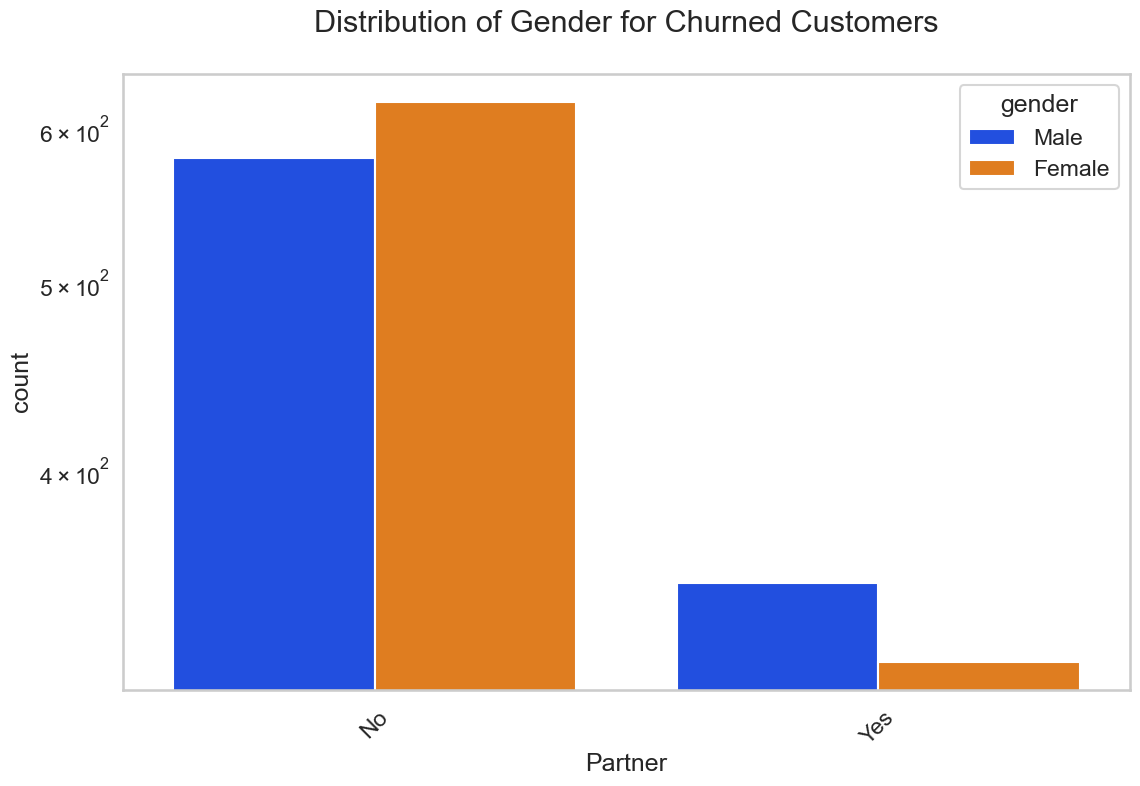

In [113]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

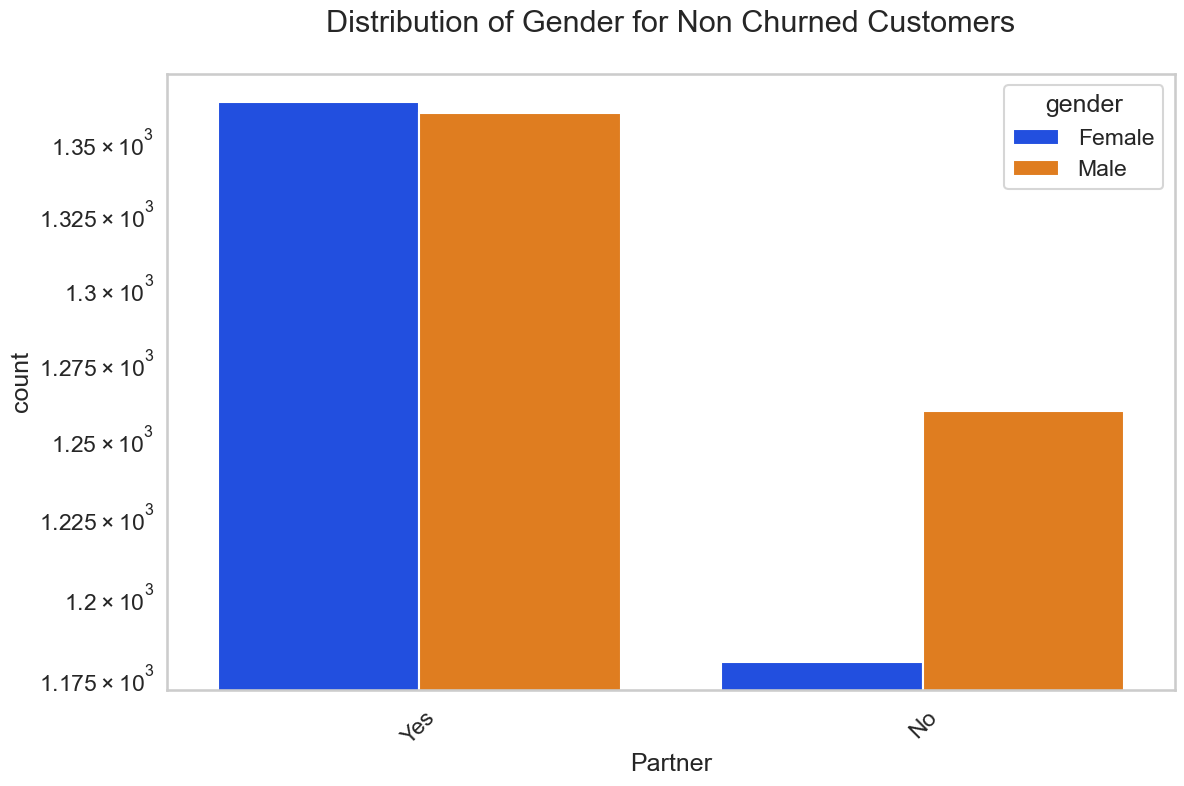

In [114]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

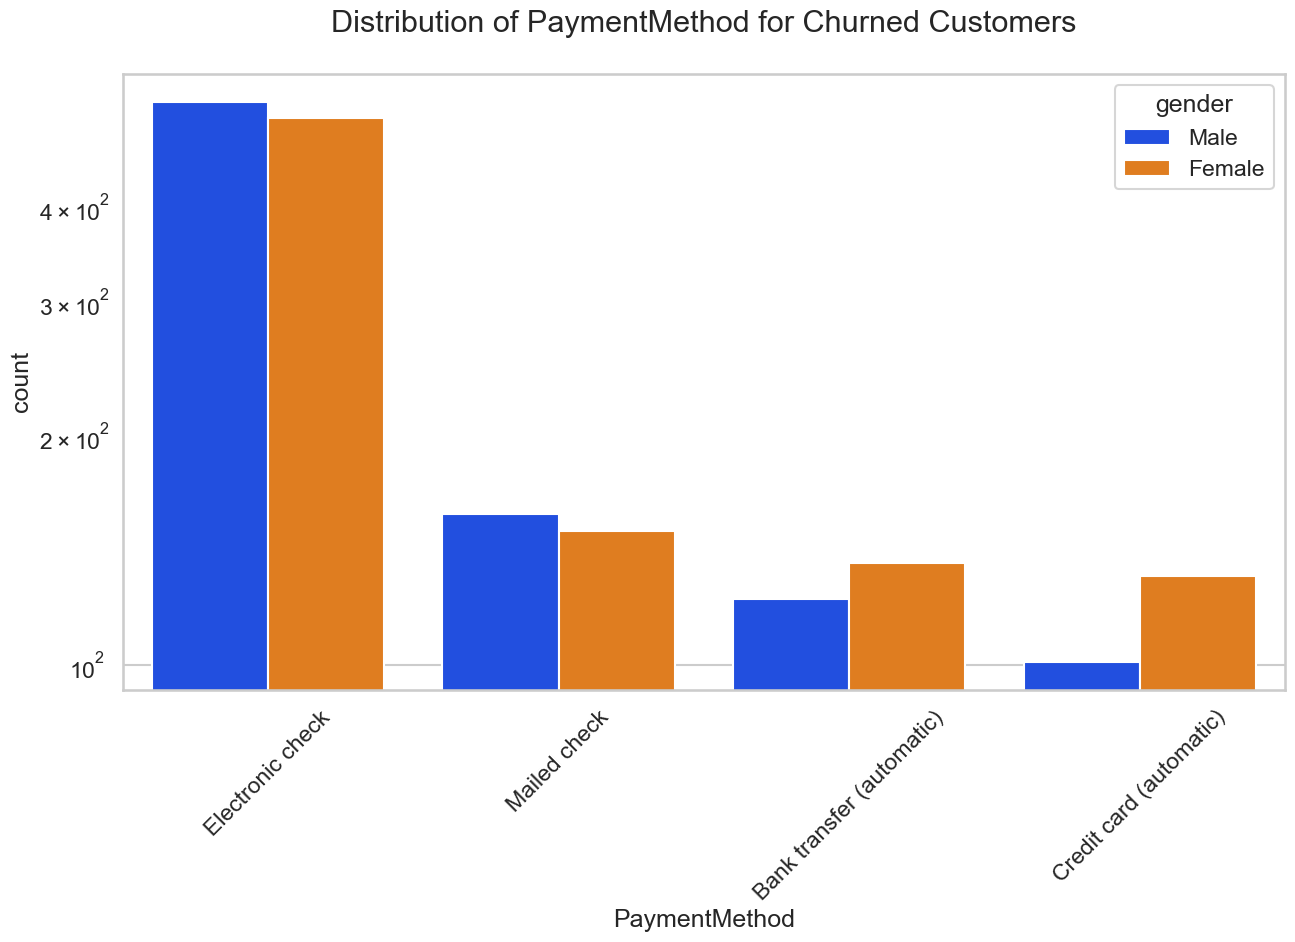

In [115]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

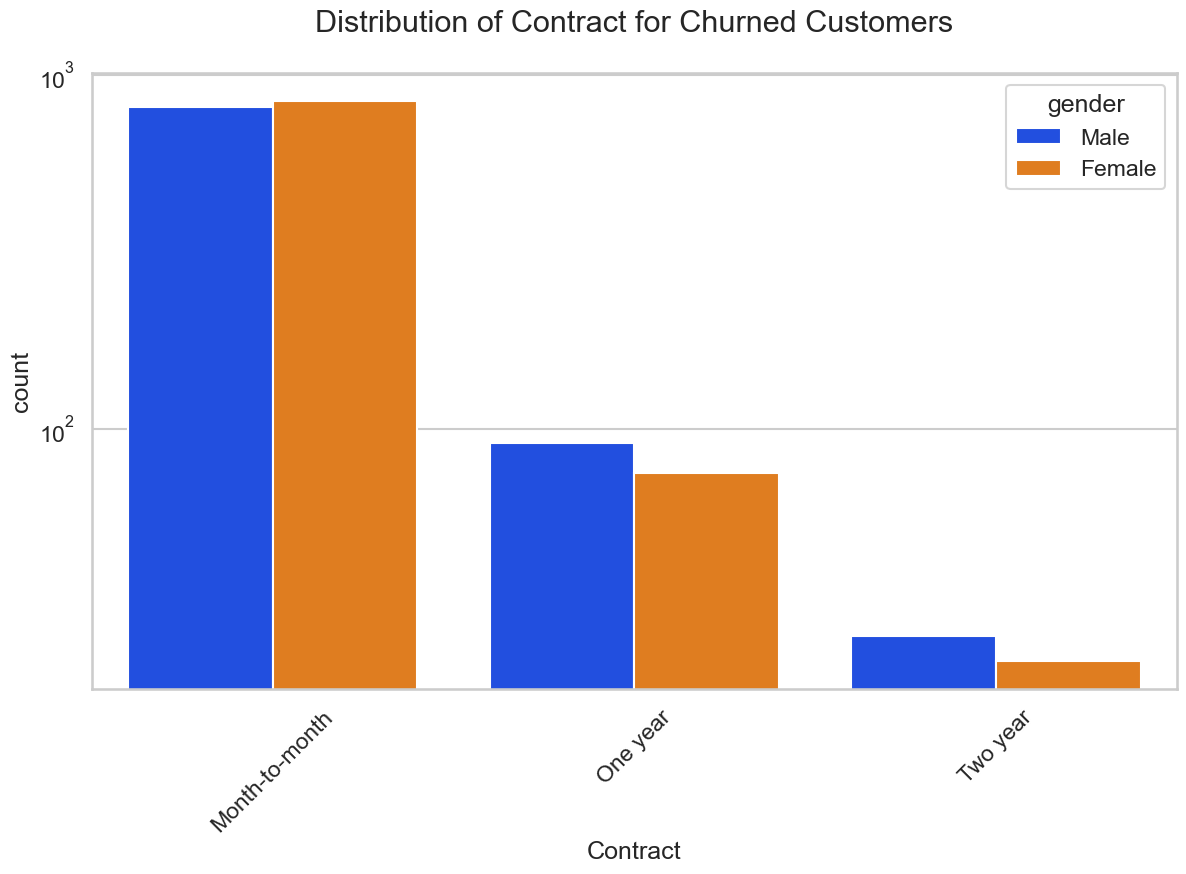

In [116]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

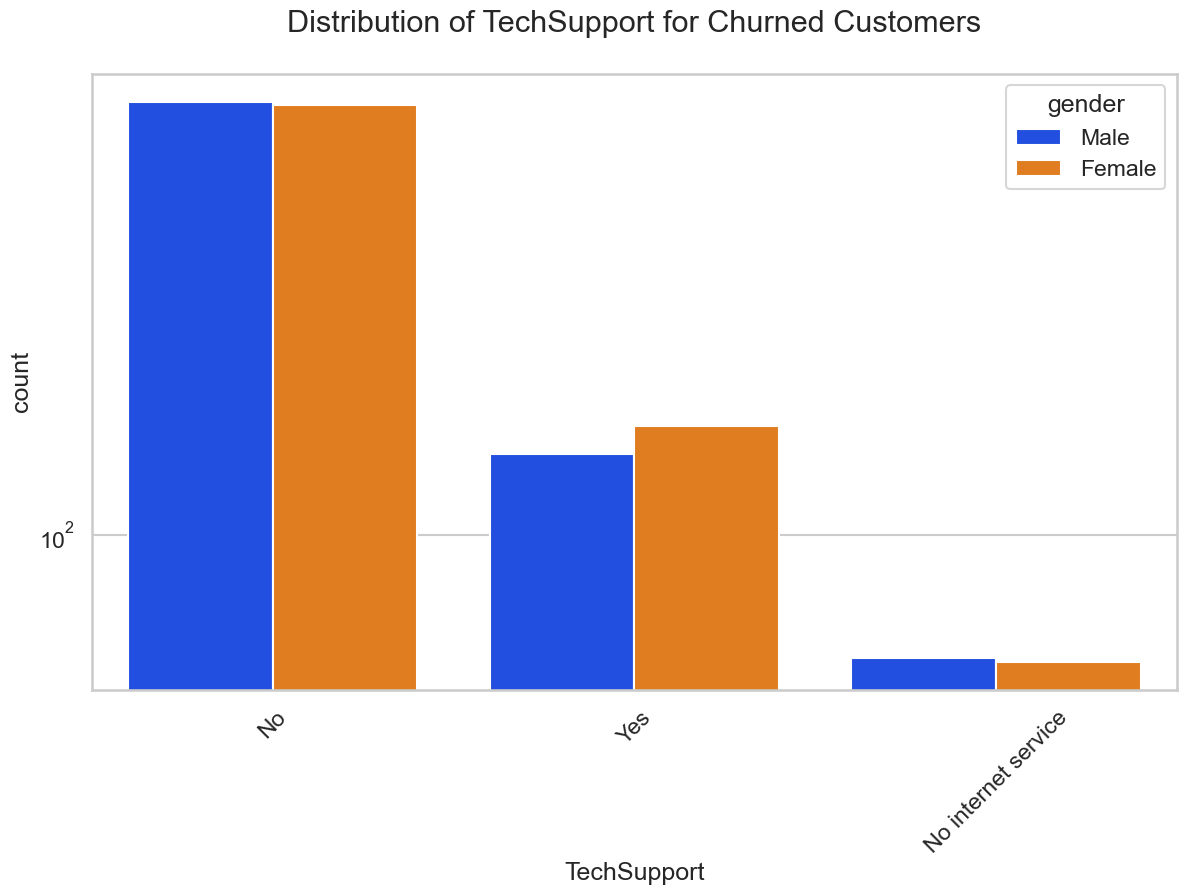

In [117]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

CONCLUSION

1) Gender has no impact on churning
2) Senior Citizens are more likely to churn,they have a churn rate of ~29%
3) Phone Service has no impact on churning
4) People with multiple lines are also less likey to churn
5) Customers with fiber optic internet are more likely to churn witha churn rate of ~29% whereas customers without internet service are very less likely to churn
6) Customers with no online security are likely to churn at a chrun rate of ~28% and customers with internet security have a churn rate of 12%
7) People with no online backup have a churn rate of ~28% compared to people with online backup wherein the churn rate is ~18%
8) Customers with internet service for tech support are high churners compared to customers without internet service
9) Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
10) Almost 44% of the customers paying via Electronic check are churners
11) People with less tenure i.e 1-12 are very high churners